# Playm

In [20]:
from IPython.core.magic import (register_line_magic, register_cell_magic,
                                register_line_cell_magic)

@register_line_magic
def lmagic(line):
    "my line magic"
    return line

@register_cell_magic
def cmagic(line, cell):
    with capture_output(out, err, disp) as io:
        self.shell.run_cell(cell)
    if args.output:
        self.shell.user_ns[args.output] = io
    return line, cell

@register_line_cell_magic
def lcmagic(line, cell=None):
    "Magic that works both as %lcmagic and as %%lcmagic"
    if cell is None:
        print("Called as line magic")
        return line
    else:
        print("Called as cell magic")
        return line, cell

# In an interactive session, we need to delete these to avoid
# name conflicts for automagic to work on line magics.
del lmagic, lcmagic

In [21]:
%%lcmagic
"ab"

Called as cell magic


('', '"ab"\n')

In [11]:

from IPython.core import magic_arguments
from IPython.core.magic import (Magics, magics_class, line_magic, cell_magic,
                                line_cell_magic, on_off, needs_local_scope,
                                no_var_expand)

from IPython.utils.capture import capture_output

def plot():
    fig, ax = plt.subplots()  # Create a figure containing a single axes.
    ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.
    ax.get_figure()
    pd.DataFrame({"a": [1,2], "b": [3,5]}).plot.bar()

class ExecutionMagics(Magics):
    def __init__(self, shell):
        super(ExecutionMagics, self).__init__(shell)
        # Default execution function used to actually run user code.
        self.default_runner = None
        
    @magic_arguments.magic_arguments()
    @magic_arguments.argument('output', type=str, default='', nargs='?',
        help="""The name of the variable in which to store output.
        This is a utils.io.CapturedIO object with stdout/err attributes
        for the text of the captured output.
        CapturedOutput also has a show() method for displaying the output,
        and __call__ as well, so you can use that to quickly display the
        output.
        If unspecified, captured output is discarded.
        """
    )
    @magic_arguments.argument('--no-stderr', action="store_true",
        help="""Don't capture stderr."""
    )
    @magic_arguments.argument('--no-stdout', action="store_true",
        help="""Don't capture stdout."""
    )
    @magic_arguments.argument('--no-display', action="store_true",
        help="""Don't capture IPython's rich display."""
    )
    @cell_magic
    def capture2(self, line, cell):
        """run the cell, capturing stdout, stderr, and IPython's rich display() calls."""
        args = magic_arguments.parse_argstring(self.capture, line)
        out = not args.no_stdout
        err = not args.no_stderr
        disp = not args.no_display
        with capture_output(out, err, disp) as io:
            self.shell.run_cell(cell)
        if args.output:
            self.shell.user_ns[args.output] = io

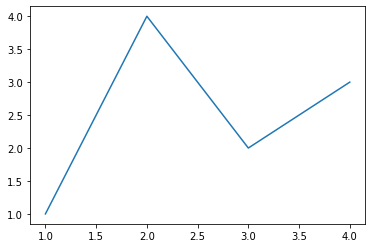

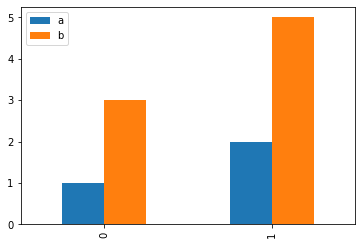

In [30]:
%matplotlib inline

from IPython.utils.capture import capture_output
with capture_output(True, True, True) as io:
    fig, ax = plt.subplots()  # Create a figure containing a single axes.
    ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.
    ax.get_figure()
    pd.DataFrame({"a": [1,2], "b": [3,5]}).plot.bar()

In [43]:
io.outputs[1].metadata

{}

In [49]:
%%capture io2
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.
ax.get_figure()
pd.DataFrame({"a": [1,2], "b": [3,5]}).plot.bar()

In [52]:
[el.metadata for el in io2.outputs]

[{}, {}, {}, {'needs_background': 'light'}, {'needs_background': 'light'}]

In [42]:
rich_output

<IPython.core.display.Javascript object>

In [2]:
#import pyforest
import pandas as pd
import numpy as np
import yellowbrick as yb
from sklearn.model_selection import cross_val_score

In [3]:
from kaggle import KaggleApi
kapi = KaggleApi()
kapi.authenticate()

In [4]:
%matplotlib notebook

In [5]:
%matplotlib

Using matplotlib backend: nbAgg


In [6]:
%run ~/dev/ds/helpers.ipynb

<IPython.core.display.Javascript object>

/Users/nicokreiling/anaconda3/envs/ds/lib/python3.7/site-packages/ipywidgets/widgets/widget.py:282: DeprecationWarning:

Widget registration using a string name has been deprecated. Widget registration now uses a plain `@register` decorator.

/Users/nicokreiling/anaconda3/envs/ds/lib/python3.7/site-packages/qgrid/grid.py:573: DeprecationWarning:

metadata {'sync': True} was set from the constructor. With traitlets 4.1, metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')



# Data Understanding

Mit diesem Vorwissen werden wir die gegebenen Daten analysen, um eine Aussage über die Machbarkeit der Aufgabe zu erlangen

## Data Loading

In [7]:
df = pd.read_csv("./data/titanic/train.csv")
df.dtypes.to_dict()

{'PassengerId': dtype('int64'),
 'Survived': dtype('int64'),
 'Pclass': dtype('int64'),
 'Name': dtype('O'),
 'Sex': dtype('O'),
 'Age': dtype('float64'),
 'SibSp': dtype('int64'),
 'Parch': dtype('int64'),
 'Ticket': dtype('O'),
 'Fare': dtype('float64'),
 'Cabin': dtype('O'),
 'Embarked': dtype('O')}

In [8]:
schema = {'PassengerId': np.int64,
 'Survived': np.int64,
 'Pclass': np.int64,
 'Name': str,
 'Sex': 'category',
 'Age': np.float64,
 'SibSp': np.int64,
 'Parch': np.int64,
 'Ticket': str,
 'Fare': np.float64,
 'Cabin': str,
 'Embarked': 'category'}
target_col = "Survived"

schema_test = schema
del schema_test[target_col]

In [9]:
from helpers import DataLoader
train_l = DataLoader("data/titanic/train.csv","Survived", schema)

In [10]:
X, y = train_l.get_Xy()

In [11]:
train = train_l.load_data()
train.shape

(891, 12)

In [12]:
test_l = DataLoader("data/titanic/test.csv","Survived", schema_test)
test = test_l.load_data()
test.shape

(418, 11)

In [13]:
print("Train Dimensions:", train.shape)
print("Test Dimensions:", test.shape)

# preview the data
train.head()

Train Dimensions: (891, 12)
Test Dimensions: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Missing data

In [14]:
pd.concat([train, test]).isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## Kaggle Submission

# Pipeline

In [15]:
#%%writefile model_preperation.py
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import label_binarize

def get_title(names):
    titles = names.str.extract(' ([A-Za-z]+)\.', expand=False)
    titles = titles.replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Rare')
    titles = titles.replace('Mlle','Miss')
    titles = titles.replace('Ms','Miss')
    titles = titles.replace('Mme','Mrs')
    return titles

class ModelPreperation(sklearn.base.TransformerMixin):
    #Class Constructor 
    def __init__( self ):
        self.title_encoder = LabelEncoder()
        pass
     
    def fit( self, X, y=None):
        self.default_age = X.Age.median()
        self.default_price = X.Fare.mean()
        self.default_harbor = X.Embarked.mode()[0]
        self.title_encoder.fit(get_title(X.Name))
        return self
        
    def transform( self, df):
        df = df.copy()
        df["Age"].fillna(self.default_age, inplace=True)
        df["Fare"].fillna(self.default_price, inplace=True)
        df["Embarked"].fillna(self.default_harbor, inplace=True)
        df['Sex'] = label_binarize(df.Sex, ['male', 'female'])
        df["has_cabin"] = ~df.Cabin.isna()
        df["title"] = self.title_encoder.transform(get_title(df.Name))
        df.drop(["Cabin","Name","Ticket","PassengerId"], axis=1, inplace=True)
        df = pd.get_dummies(df, prefix=['Embarked'], columns=['Embarked'], drop_first=True)
        return df

def get_pipeline():
    #gb_params = {'n_estimators': 200,'min_samples_split': 16,'min_samples_leaf': 16,'max_features': 5,'max_depth': 3,'learning_rate': 0.25}
    gb_params = {'n_estimators': 32,'min_samples_leaf': 2,'max_depth': 3,'learning_rate': 0.25}
    pipe = Pipeline(steps=[
        ("prepare",ModelPreperation()), 
        ("clr",GradientBoostingClassifier(**gb_params))
    ])
    return pipe
    
def train_pipe(pipe):
    return pipe.fit(*get_Xy())

<>:10: DeprecationWarning:

invalid escape sequence \.

<>:10: DeprecationWarning:

invalid escape sequence \.

<>:10: DeprecationWarning:

invalid escape sequence \.

<ipython-input-15-81be4d8c07c7>:10: DeprecationWarning:

invalid escape sequence \.



<IPython.core.display.Javascript object>

## Train

In [13]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import ValidationCurve, LearningCurve
from sklearn.model_selection import RandomizedSearchCV

gb_hpt_params = dict()
gb_hpt_params["n_estimators"] = [8, 16, 32, 64, 100, 200]
gb_hpt_params["min_samples_split"] = [2,3,4,5,6,7,8,9,10,20,30,40,50]
gb_hpt_params["min_samples_leaf"] = [1, 2, 4, 8, 16, 32, 64, 100, 200]
gb_hpt_params["max_depth"] = [2, 3, 4, 8]
gb_hpt_params["max_features"] = list(range(3, len(X)))
gb_hpt_params["learning_rate"] = [1, 0.5, 0.25, 0.2, 0.15, 0.1, 0.05, 0.01]

In [14]:
pipe = get_pipeline()
X, y = train_l.get_Xy()

<IPython.core.display.Javascript object>

In [15]:
prepare = pipe.steps[0][1].fit(X, y)
X_ = prepare.transform(X)

In [16]:
gb_params = {'n_estimators': 32,'min_samples_leaf': 2,'max_depth': 3,'learning_rate': 0.25}
classifier = GradientBoostingClassifier(**gb_params)

<IPython.core.display.Javascript object>

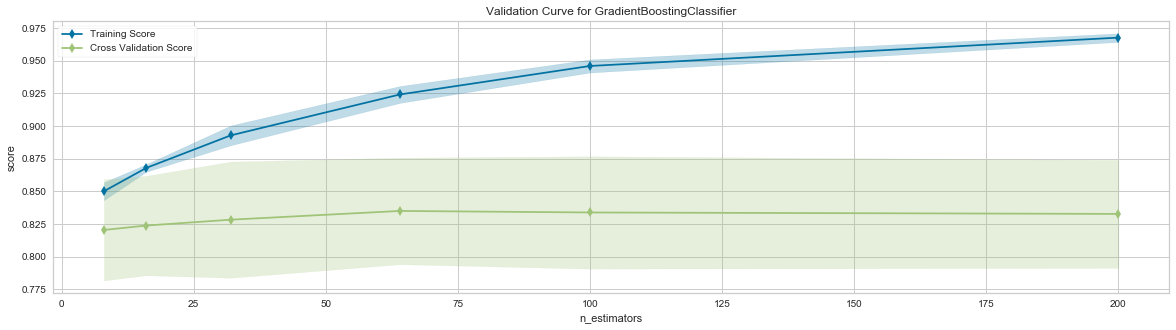

In [17]:
attr = "n_estimators"
viz = yb.model_selection.ValidationCurve(
    classifier, param_name=attr,
    param_range=gb_hpt_params[attr], cv=10, scoring="accuracy", n_jobs=-1
)

viz.fit(X_, y).show()

In [18]:
def get_scores(y_test, predictions):
    report = classification_report(y_test, predictions, target_names=["Survived", "Drown"], output_dict=True)
    res = report["weighted avg"]
    res["accuracy"] = report["accuracy"]
    return res

#get_scores(y_test, predictions)

In [19]:

def learning_curve(model, X, y, scoring='accuracy'):
    from yellowbrick.model_selection import LearningCurve

    cv = StratifiedKFold(n_splits=12)
    sizes = np.linspace(0.3, 1.0, 10)

    visualizer = LearningCurve(model, cv=cv, scoring=scoring, train_sizes=sizes, n_jobs=-1)

    visualizer.fit(X, y)        # Fit the data to the visualizer
    figsize(12,5)
    visualizer.show()           # Finalize and render the figure
    

In [86]:
%matplotlib inline
def feature_importance(classifier, X):
    if hasattr(classifier, "feature_importances_"):
        feature_importances = pd.DataFrame(zip(X.columns, classifier.feature_importances_), columns=["feature", "importance"])\
        .set_index("feature").sort_values("importance")
    else:
        print("No feature importance found")
        return None
    fig = feature_importances.plot.barh().axes.get_figure()
    print(fig.show())
    return fig

In [87]:
backend_inline

NameError: name 'backend_inline' is not defined

In [21]:
%matplotlib widget

In [19]:
import ipympl
%matplotlib notebook

In [1]:
%matplotlib ipympl
import matplotlib.pyplot as plt
plt.plot([0,1,1,2])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
conda install jupyterlab jupyterlab_server tk nodejs
pip install ipympl
jupyter labextension install @jupyter-widgets/jupyterlab-manager jupyter-matplotlib

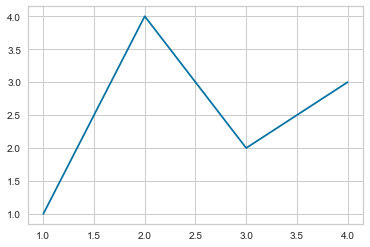

In [120]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.use('Agg')

@out.capture()
def plot():
    fig, ax = plt.subplots()  # Create a figure containing a single axes.
    ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.
    ax.get_figure()

plot()

In [119]:
print("out", out)

out Output()


In [26]:
from IPython.utils.capture import capture_output
out = True
err = True
disp = True
with capture_output(out, err, disp) as io:
    type1.get_figure()

In [31]:
io.stdout

''

In [59]:
%matplotlib inline

In [18]:
from yellowbrick.model_selection import LearningCurve

model = pipe
X, y = train_l.get_Xy()
    
#cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

visualizer = LearningCurve(model, cv=12, scoring="accuracy", train_sizes=sizes, n_jobs=-1)

visualizer.fit(X, y)        # Fit the data to the visualizer
figsize(12,5)
type1 = visualizer.show()  

<IPython.core.display.Javascript object>

In [18]:
figsize(12,5)
type2=pd.DataFrame({"a": [1,2], "b": [3,5]}).plot.bar()

In [33]:
type1.get_figure()

from ipywidgets import Output
out = Output()
with out:
    type1.get_figure()
    type2.get_figure()

In [34]:
out

Output()

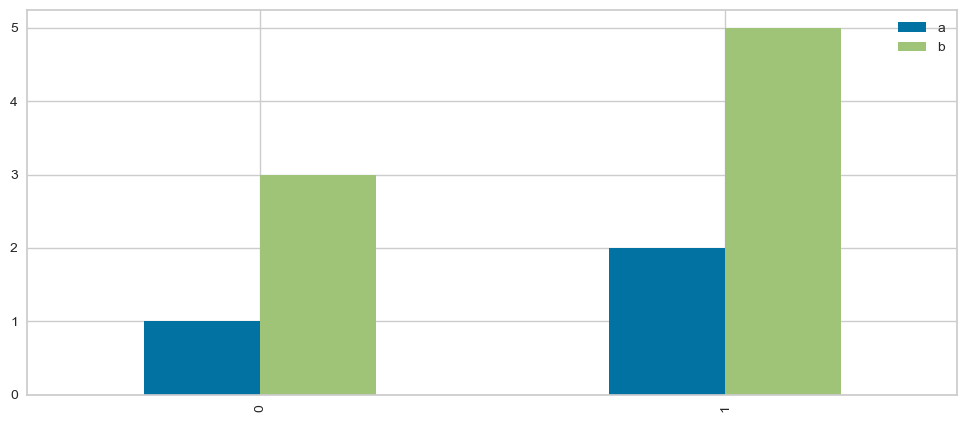

In [37]:
type2.get_figure()

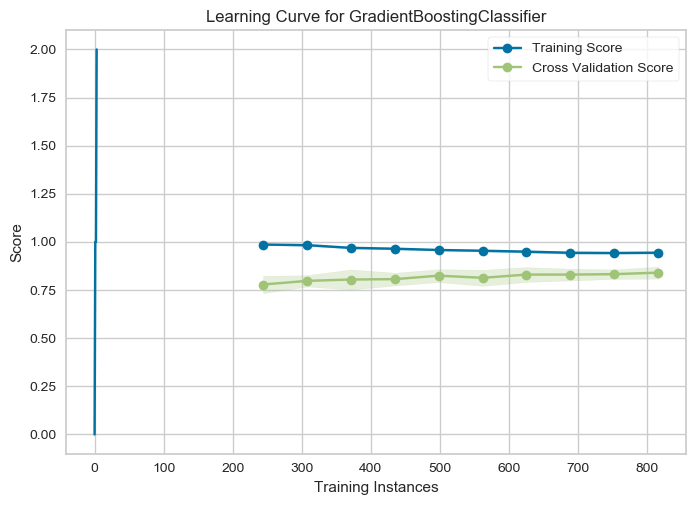

In [38]:
type1.get_figure()

In [ ]:
with ab:
    

## Magic

In [ ]:
from IPython.core.magic import (register_line_magic, register_cell_magic,
                                register_line_cell_magic)

@register_line_magic
def lmagic(line):
    "my line magic"
    return line

@register_cell_magic
def cmagic(line, cell):
    "my cell magic"
    return line, cell

@register_line_cell_magic
def lcmagic(line, cell=None):
    "Magic that works both as %lcmagic and as %%lcmagic"
    if cell is None:
        print("Called as line magic")
        return line
    else:
        print("Called as cell magic")
        return line, cell

# In an interactive session, we need to delete these to avoid
# name conflicts for automagic to work on line magics.
del lmagic, lcmagic

## Logger

In [21]:
from mlflow.tracking import fluent

mlflow = MLFlowHelper(fluent, "accuracy")

In [22]:
mlflow.best_runs()

,run_id,experiment_id,status,start_time,metrics.accuracy,metrics.std_accuracy,tags.mlflow.user,tags.mlflow.source.name,tags.mlflow.source.type
0,aff341e1de6d41aaaf74d7542ce23a92,0,FAILED,2020-03-09 16:35:21.670000+00:00,0.842896,0.023891,nicokreiling,/Users/nicokreiling/anaconda3/envs/ds/lib/pyth...,LOCAL


In [ ]:
# Annotation

In [16]:
#@track
def train(pipe):
    learning_curve(pipe, *train_l.get_Xy())
    
    cv_result = cross_val_score(pipe, X, y = y, scoring = "accuracy", cv = 5, n_jobs=-1)
    print("accuracy:", cv_result.mean())
    print("std accuracy:", cv_result.std())
    clf = pipe.fit(X, y)
    pipe.fit(X, y)
    feature_importance(clf.steps[1][1], X)
    
    return pipe, cv_result

In [17]:
gb_params = {'n_estimators': 96,'min_samples_leaf': 2,'max_depth': 3,'learning_rate': 0.25}
model = GradientBoostingClassifier(**gb_params)
pipe = Pipeline(steps=[
    ("prepare",ModelPreperation()), 
    ("clr",model)
])

from ipywidgets import Output
out = Output()
with out:
    result = func(*args, **kwargs)
return_val = train(pipe)
return_val

<IPython.core.display.Javascript object>

NameError: name 'learning_curve' is not defined

In [38]:
out.outputs

({'output_type': 'display_data',
  'data': {'text/plain': '<Figure size 864x360 with 1 Axes>',
   'image/png': 'iVBORw0KGgoAAAANSUhEUgAAAtQAAAFKCAYAAAA9qcheAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8li6FKAAAgAElEQVR4nOzdd7xdVZ3//9fe+5TbU25uCgRJARYJoSUgEFBp1iEgMwwmgAWVGUGQYgII+fILjCIIFmAEBx0EZKgKAzgGR5EydIxBEspKIAkEEtJz+ym7/P5Ye592+z335uYmn+fDeM7u+5SQ917ns9eygiBACCGEEEII0T/2UJ+AEEIIIYQQw5kEaiGEEEIIIcoggVoIIYQQQogySKAWQgghhBCiDBKohRBCCCGEKIMEaiGEEEIIIcoQG+oTEELsPJRSk4DlWuuaITj2NcA7Wuu7B2h/FcCVwEmABTjAPcCPtNY7tL9QpdRngF8CG4BPaa3b+7mfKuAK4NRwVhXwHHCp1np9mef478BmrfUipdQfgPla6zf7ua9vAgmt9a1Kqa8BNwGrMZ9DHFgFnFPuOXdx7P8FztBaby73dYT7OwmYD4zEnPvycJ9rw9d2mtb6pAE49eh4ewC/1VrPVkrVAYvDY/8AOF9rPXugjiWEGDgSqIUQOwWt9VUDtS+llAX8N7ACOEprnVJK1QP/A9QA/2+gjtVLc4Ffaq2/398dKKUc4AngDeDjWutWpZQNLAAWK6UOHagLBa31F8rcxTGY4Bn5v8LQqZS6FbgGOKfM43Tm09GTcl+HUuoMYCFwstb6nfB7dTnwlFLqgPJOs3Na63VAFJoPAcZprfcJp+8djGMKIcongVoI0StKqQRw

In [ ]:
# Working

In [32]:
%%capture inline_display
gb_params = {'n_estimators': 96,'min_samples_leaf': 2,'max_depth': 3,'learning_rate': 0.25}
model = GradientBoostingClassifier(**gb_params)
pipe = Pipeline(steps=[
    ("prepare",ModelPreperation()), 
    ("clr",model)
])

return_val = train(pipe)

AttributeError: 'Output' object has no attribute 'stdout'

In [25]:
from helpers import Logger
l = Logger(cell=inline_display, returnval=return_val)

In [26]:
l.compare(mlflow.last_run())

metrics:
accuracy            : eq.
std_accuracy        : eq.

params:


In [27]:
l.log_mlflow()

AttributeError: 'NoneType' object has no attribute 'items'

In [ ]:
mlflow.best_runs()

In [ ]:
type(best["params"][])

In [ ]:
float("ab2")

In [ ]:
from helpers import compare_dicts
compare_dicts(l.asdict(), h.last_run().data.to_dictionary())

In [ ]:
from sklearn.naive_bayes import GaussianNB
from yellowbrick.datasets import load_occupancy
from yellowbrick.classifier import precision_recall_curve


X, y = load_occupancy()
visualizer = precision_recall_curve(GaussianNB(), X, y)

In [ ]:
_40

In [ ]:
%%capture captured


In [ ]:
a,b = 

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

cv = StratifiedKFold(n_splits=5, random_state=42)

classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit()
plot_learning_curve(classifier, "Decision Tree", X, y, axes=axes[:], cv=cv, n_jobs=4)

predictions = classifier.predict(X_test)
diff = pd.Series(get_scores(y_test, predictions))-baseline
print(diff)

print(classification_report(y_test, predictions, target_names=["Survived", "Drown"]))
plt.show()

## Hyper-Parameter

In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

X_train = train.drop(columns="Survived")
y_train = np.ravel(train[['Survived']])

gb = GradientBoostingClassifier()
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = gb_hpt_params, \
                               n_iter = 100, scoring="f1", cv = 5, verbose=2, random_state=42, n_jobs = -1)
gb_random.fit(X_train, y_train)

In [ ]:
gb_random.best_params_

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

classifier = GradientBoostingClassifier(**gb_random.best_params_)
classifier.fit(X_train, y_train)
plot_learning_curve(classifier, "Decision Tree", X, y, axes=axes[:], cv=cv, n_jobs=4)

predictions = classifier.predict(X_test)
diff = pd.Series(get_scores(y_test, predictions))-baseline
print(diff)

print(classification_report(y_test, predictions, target_names=["Survived", "Drown"]))
plt.show()

In [ ]:
bt_predictions = predictions.copy()
bt_baseline = pd.Series(get_scores(y_test, predictions))
bt_classifier = classifier

In [ ]:
gb_random.best_params_

In [ ]:
classifiers = [DecisionTreeClassifier(max_depth=3),GradientBoostingClassifier(**gb_random.best_params_)]

gb_params = {'n_estimators': 200,'min_samples_split': 16,'min_samples_leaf': 16,'max_features': 5,'max_depth': 3,'learning_rate': 0.25}
classifiers.append(GradientBoostingClassifier(**gb_params))

algorithm_names = ["DT", "GB_hpt", "GB_custom"]
cv_means = []
cv_std = []
for classifier in classifiers:
    classifier.random_state=42
    cv_result = cross_val_score(classifier, X_train, y = y_train, scoring = "f1", cv = cv, n_jobs=-1)
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_res = pd.DataFrame({"mean":cv_means,"std": cv_std,"Algorithm":algorithm_names})

figsize(15,5)
g = sns.barplot("mean","Algorithm",data = cv_res, xerr=cv_std)
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

fig, axes = plt.subplots(3, len(classifiers), figsize=(20, 20))

for i, estimator in enumerate(classifiers):
    title = f"{estimator.__class__.__name__}"
    plot_learning_curve(estimator, title, X, y, axes=axes[:, i],
                        cv=cv, n_jobs=4)

plt.show()

In [ ]:

from sklearn.model_selection import StratifiedKFold

# Ludwig

In [ ]:
prepare = ModelPreperation()
train_df = prepare.fit_transform(train_l.get_data())

In [ ]:
train_df.isnull().sum()

In [ ]:
%%writefile model_definition.yaml
input_features:
    -
        name: Pclass
        type: category
    -
        name: Sex
        type: category
    -
        name: Age
        type: numerical
    -
        name: SibSp
        type: numerical
    -
        name: Parch
        type: numerical
    -
        name: Fare
        type: numerical
    -
        name: Embarked
        type: category

output_features:
    -
        name: Survived
        type: binary

In [ ]:
import yaml

with open(r'model_definition.yaml') as file:
     model_definition = yaml.load(file, Loader=yaml.FullLoader)

In [ ]:
model_definition

In [ ]:
train_df

In [ ]:
train, test = train_test_split(pd.read_csv("data/titanic/train.csv"))

In [ ]:
train_l.load_data()

In [ ]:
train

In [ ]:
from ludwig.api import LudwigModel
ludwig_model = LudwigModel(model_definition)
train_stats = ludwig_model.train(data_df=train)

In [ ]:
predictions, test_stats = ludwig_model.test(data_df=test)

In [ ]:
ludwig_model

In [ ]:
test_stats["Survived"].keys()

In [ ]:
test_stats["Survived"]["confusion_matrix"]

In [ ]:
test_stats["combined"]

In [ ]:
%matplotlib inline
from ludwig.visualize import compare_performance
compare_performance(train_stats,"Survived")

In [ ]:
%matplotlib inline
from ludwig.visualize import learning_curves
learning_curves(
  train_stats, "Survived"
)

In [ ]:
ludwig_model.predict(pd.read_csv("data/titanic/test.csv"))

In [ ]:
ludwig_model.model.accuracy_Survived

In [ ]:
type(test_stats)

# Kaggle Submission

In [ ]:
make_kaggle_submission(get_pipeline(), submission_name="simpler hyper-params")

In [ ]:
calc_cross_val_scores(get_pipeline())

In [ ]:
get_scores()

In [ ]:
kapi.competition_submissions("titanic")

In [ ]:
filename = 'submissions/2020-02-22 15:30:50.844082.csv'
with open(filename) as blob:
    thread = kapi.competitions_submissions_submit(filename, "first submission", "titanic", async_req=True)
    result = thread.get()

# Basic Data Preparation

In [ ]:
train_with_nas = train.copy()
test_with_nas = test.copy()

## Missing Values

Missing Values, also unbekannte Werte stellen für viele Machine Learning Algorithmen ein Problem dar (wenn auch nicht für alle), da sie im wesentlichen mit nummerischen Werten arbeiten. Grundsätzlich ist es daher eine gute Idee fehlende Werte zu ersetzen. Hierfür gibt es zahlreiche Möglichkeiten, wie etwa:

* Das ersetzen mit einem fest definiertem Wert
    * Für numerische Werte nutzt man den Durchschnittswert (average) oder den Mittelwert (median).
    * Für kategorische Werte empfiehlt sich die häufigsten Klasse
    
* Das ersetzen mit einem repräsentativen Wert
    * Equivalent zu oben, allerdings wird der Wert innerhalb einer repräsentativen Subgruppe gebildet
    * Automatische Bildung mehrer Cluster (etwa via kNN)
    
* Das ersetzen mit einem algorithmisch bestimmten Werts
    * Regressions- und Klassifikationsmodelle
    * Deep Learning

In [ ]:
df = train.append(test)
df.isnull().sum().sort_values(ascending=False)

In [ ]:
default_age = train.Age.median()

for df in [train, test]:
    df.Age.fillna(default_age, inplace=True)

In [ ]:
default_price = train.Fare.mean()

for df in [train, test]:
    df.Fare.fillna(default_price, inplace=True)

In [ ]:
default_harbor = train.Embarked.mode()[0]

for df in [train, test]:
    df.Embarked.fillna(default_harbor, inplace=True)

In [ ]:
df = train.append(test)
df.isnull().sum().sort_values(ascending=False)

**Alternative** Scikit-Learn Missing Value Imputer

In [ ]:
train.Embarked.values.reshape(-1, 1)[:5]

In [ ]:
from sklearn.impute import SimpleImputer

embarked_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
embarked_imp.fit_transform(train.Embarked.values.reshape(-1, 1))
without_nas = embarked_imp.transform(test.Embarked.values.reshape(-1, 1))

# Check if there are still NAs?
pd.Series(np.ravel(without_nas)).isna().sum()

## Feature Transformation

Nicht nur Missing Values sind problematisch für Algorithmen, sondern auch andere nicht nummerische Werte. Zwar wandeln zahlreiche Verfahren etwa Boolean-Werte automatisch in eine 1/0 Darstellung um, dennoch empfiehlt es sich auch hier Zeichenketten (strings) und kategoriale Werte entsprechend umzuwandeln. Gängige Verfahren sind:

* Binarize: Darstellung in Binärzahlen (1 und 0 für True und False)
* [One Hot Encoding](http://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example)
* Dummy Encoding

In [ ]:
from sklearn.preprocessing import label_binarize
for df in [train, test]:
    df['Sex'] = label_binarize(df.Sex, ['male', 'female'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
harbour_encocer = LabelEncoder()
harbour_encocer.fit(train.Embarked)
for df in [train, test]:
    df["Embarked"] = harbour_encocer.transform(df.Embarked)

In [ ]:
df.dtypes

In [ ]:
df.select_dtypes(exclude=[np.number])

In [ ]:
for df in [train, test]:
    df.drop(["Name","Ticket"], axis=1, inplace=True)

## einfaches Feature Engineering

Nicht alle Informationen lasssen sich so standardisiert in maschinell verarbeitbare Daten überführen. Beim Feature Engineering geht es darum, neue spalten zu erstellen, die für die algorithmen zusätzliche, wertvolle Informationen berreitstellen.

### Schiffskabine

Einige Passagiere haben eine Kabinennummer, anhand derer sich eventuell auf die Position im Boot (Deck, Innen- oder Außenkabine, Rumpf- oder Heckbereich) schließen lassen könnte, jedoch ist dies nicht offensichtlich. Dennoch bietet aufgrund der vielen fehlenden Werte allein die Information, dass ein Passagier eine Kabine hatte (das war nicht selbstverständlich) eine wertvolle Information die wir nutzen wollen.

In [ ]:
len(train.loc[train.Cabin.isna()]) / len(train.Cabin)

In [ ]:
for df in [train, test]:
    df["has_cabin"] = ~df.Cabin.isna()
    
for df in [train, test]:
    df.drop("Cabin", axis=1, inplace=True)

### Familiengröße

Im Datensatz finden sich die zwei Spalten SibSp (=Siblings/Spouses, also Ehegatten oder Geschwister) und Parch (Eltern / Kinder). Diese etwas verwirrende Aufteilung lässt sich deutlich einfacher darstellen, in dem wir beide Werte einfach als Familiengröße zusammenfassen.

In [ ]:
df.SibSp + df.Parch

In [ ]:
for df in [train, test]:
    df["family_size"] = df.SibSp + df.Parch

## Aufgaben

* Überprüfe, wie das Feature Familiengröße im Verhältnis zur Überlebenswahrscheinlichkeit steht
* Erstelle ein Feature, dass aussagt, ob eine Person alleine reist
* Erstelle eine Funktion, welche alle fehlenden Werte in einem DataFrame bereinigt und mache konfigurierbar, ob das DataFrame selbst oder eine Kopie bereinigt werden soll

### Analyse Familiengröße

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 6]

train.family_size.value_counts().sort_index().plot(kind="bar")

In [ ]:
train.groupby(["family_size","Survived"]).size().unstack("Survived").plot(kind="bar")

### Alleinreinde-Feature

Zwar könnte angenommen werden, dass Algorithmen anhand der Familiengröße auch Alleinreisende identifizieren können. Allerdings ist längst nicht gewährleistet, dass Algorithmen entsprechende (komplexe) Zusammenhänge aufgreifen. Generell sollten daher wichtige Informationen in möglichst einfach verarbeitbaren Informationen dargereicht werden.

In [ ]:
(df.SibSp + df.Parch) == 0

In [ ]:
for df in [train, test]:
    df["is_alone"] = (df.SibSp + df.Parch) == 0


In [ ]:
# Entfernen unnötiger Spalten

In [ ]:
unused_columns = ["PassengerId", "SibSp", "Parch", "Name", "Ticket", "Cabin"]

for df in [train, test]:
    df.drop(columns=unused_columns, inplace=True, errors='ignore')

### Missing Value Funktion

In [ ]:
from sklearn.impute import SimpleImputer

def fill_missing_values(df, copy=False):
    if copy:
        df = df.copy()
        
    fill_na_strategies = {
        "Age": "median",
        "Fare": "mean",
        "Embarked": "most_frequent"
    }
    
    for col, strategy in fill_na_strategies.items():
        print(f"Fill {df[col].isna().sum()} in {col} by {strategy}")
        imp = SimpleImputer(missing_values=np.nan, strategy=strategy)
        df[col] = imp.fit_transform(df[col].values.reshape(-1, 1))
    return df

fill_missing_values(train_with_nas, copy=True)

Entferne nicht benötite Spalten

# Machine Learning (Modeling 1)

Überprüfe erneut, ob nur nummerische und boolean Werte vorkommen und fehlenden Werte mehr existieren (mit ausnahme von Survived im testset)

In [ ]:
# Check the again the data
# There should be only bool and numeric columns and no NAs beside from Survived (which of course is unkown in the testset)
df = train.append(test)
pd.DataFrame(zip(df.columns, df.dtypes, df.isna().sum()), columns=["column", "type", "NAs"])

In [ ]:
X = train.drop(columns="Survived")
y = np.ravel(train[['Survived']])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

## Entscheidungsbaum

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.tree._export import plot_tree
figsize(20, 8)
fig = plot_tree(classifier, label='root', feature_names = X.columns, impurity=True, filled=True) 

In [ ]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, y_train)

figsize(20, 8)
fig = plot_tree(classifier, label='root', feature_names = X.columns, impurity=True, filled=True) 

## Modell-Bewertung

In [ ]:
predictions = classifier.predict(X_test)

In [ ]:
pd.DataFrame(zip(predictions, y_test), columns=["predicted", "actual"]).sample(5, random_state=1)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = cm.ravel()
pd.DataFrame(cm)

In [ ]:
sns.heatmap((pd.DataFrame(cm)/len(predictions)).round(decimals=2), annot=True)

![Binäre Klassifikationsmetriken](static/metrics.png)

### False Positive Rate / Fehler 1. Art 

Wie viele der positiven Ereignisse (Passagier überlebt) wurden falsch vorhergesagt?

=> Bei wie vielen dachten wir, sie werden ertrinken, obwohl sie überlebt haben

In [ ]:
false_positive_rate = fp / (fp + tn)
false_positive_rate

### False Negative Rate / Fehler 2. Art 

Wie viele der negativen Ereignisse (verstorben) wurden falsch vorhergesagt?

=> Bei wie vielen dachten wir, sie werden ertrinken, obwohl sie überlebt haben

In [ ]:
false_negative_rate = fn / (tp + fn)
false_negative_rate

### True Negative Rate / Specificity / Spezifität 

Wie viele der negativen Ereignisse (verstorben) haben wir korrekt vorhergesagt

In [ ]:
specificity = tn / (tn + fp)
specificity

### True Positive Rate / Recall / Sensitivität

Wie viele der positiven Ereignisse (überlebt) haben wir korrekt vorhergesagt

In [ ]:
recall = tp / (tp + fn)
recall

# oder auch
from sklearn.metrics import recall_score
recall_score(y_test, predictions)

### Positive Predictive Value / Precision / Genauigkeit
Wie viele der positiv vorhergesagten Ereignisse waren auch positiv (haben auch überlebt)

In [ ]:
precision = tp/ (tp + fp)

# oder auch
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

### Accuracy

Wie viele der vorhersagen stimmen?

In [ ]:
accuracy = (tp + tn) / (tp + fp + fn + tn)

# oder auch
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

### F1-Score

Das harmonische Mittel zwischen Precision und Recall

In [ ]:
f1 = 2 * precision * recall / (precision + recall)

# oder auch
from sklearn.metrics import f1_score
f1_score(y_test, predictions)

## Modell-Analyse

In [ ]:
classifier.feature_importances_

In [ ]:
pd.DataFrame(zip(X.columns, classifier.feature_importances_), columns=["feature", "importance"])\
.set_index("feature").sort_values("importance")\
.plot.barh()

## Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(classifier, X, y, scoring = "accuracy", cv=10)
print(cv_scores)
np.mean(cv_scores)

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(classifier, X, y, scoring = "accuracy", cv=2)
print(cv_scores)
np.mean(cv_scores)

## Learning Curves

From the [Scikit-Learn Documentation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html)

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes, return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

plot_learning_curve(classifier, "Decision Tree max_depth=3", X, y, axes=axes[:], cv=cv, n_jobs=4)

plt.show()

## Aufgaben
* Erstelle eine Funktion, welche die wichtigsten Metriken berechnet und darstellt
* Probiere verschiedene Parameter für den Entscheidungsbaum aus und analysiere die Auswirkungen

### Scoring Funktion

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions, target_names=["Survived", "Drown"]))

* Precision: Anteil der als positiv prognostizierten Werte waren auch wirklich positiv
* Recall: Anteil der positiven Werte, die korrekt prognostiziert wurden
* F1: Harmonisches Mittel aus Precision und Recall
* support: Absolute Anzahl der wahren Ereignisse

In [ ]:
def get_scores(y_test, predictions):
    report = classification_report(y_test, predictions, target_names=["Survived", "Drown"], output_dict=True)
    res = report["weighted avg"]
    res["accuracy"] = report["accuracy"]
    return res

get_scores(y_test, predictions)

### Verprobe unterschiedliche Modellparameter

In [ ]:
baseline_predictions = predictions.copy()
baseline = pd.Series(get_scores(y_test, predictions))

In [ ]:
classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
diff = pd.Series(get_scores(y_test, predictions))-baseline
print(diff)

# Modeling 2

## HyperParameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

dt_hpt_params = dict()
dt_hpt_params["max_depth"] = [2,3,5,10,None]
dt_hpt_params["min_samples_leaf"] = [1,2,3,5,10]
dt_hpt_params["min_samples_split"] = [1, 2, 3,4,5,10]

In [ ]:
dt = DecisionTreeClassifier()
dt_random = RandomizedSearchCV(estimator = dt, param_distributions = dt_hpt_params,\
                               n_iter = 50, scoring="f1", cv = 5, verbose=2, random_state=42, n_jobs = -1)
dt_random.fit(X_train, y_train)

In [ ]:
dt_random.best_params_

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

classifier = DecisionTreeClassifier(**dt_random.best_params_)
classifier.fit(X_train, y_train)
plot_learning_curve(classifier, "Decision Tree", X, y, axes=axes[:], cv=cv, n_jobs=4)

predictions = classifier.predict(X_test)
diff = pd.Series(get_scores(y_test, predictions))-baseline
print(diff)

print(classification_report(y_test, predictions, target_names=["Survived", "Drown"]))
plt.show()

## Logistic Regresion

In [ ]:
from sklearn.model_selection import StratifiedKFold
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

cv = StratifiedKFold(n_splits=5, random_state=42)

classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, y_train)
plot_learning_curve(classifier, "Decision Tree", X, y, axes=axes[:], cv=cv, n_jobs=4)

predictions = classifier.predict(X_test)
diff = pd.Series(get_scores(y_test, predictions))-baseline
print(diff)

print(classification_report(y_test, predictions, target_names=["Survived", "Drown"]))
plt.show()

## Vergleich verschiedener Algorithmen

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve

cv = StratifiedKFold(n_splits=5, random_state=42)

X_train = train.drop(columns="Survived")
y_train = train[['Survived']]

classifiers = [DecisionTreeClassifier(), LogisticRegression(), KNeighborsClassifier(), GradientBoostingClassifier()]

algorithm_names = []
cv_means = []
cv_std = []
for classifier in classifiers:
    classifier.random_state=42
    algorithm_names.append(type(classifier).__name__)
    cv_result = cross_val_score(classifier, X_train, y = y_train, scoring = "f1", cv = cv, n_jobs=-1)
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
#algorithm_names = ["SVC","DecisionTree","AdaBoost","RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]
cv_res = pd.DataFrame({"mean":cv_means,"std": cv_std,"Algorithm":algorithm_names})

In [ ]:
cv_res

In [ ]:
figsize(15,5)
g = sns.barplot("mean","Algorithm",data = cv_res, xerr=cv_std)
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [ ]:
fig, axes = plt.subplots(3, len(classifiers), figsize=(20, 20))

for i, estimator in enumerate(classifiers):
    title = f"{estimator.__class__.__name__}"
    plot_learning_curve(estimator, title, X, y, axes=axes[:, i],
                        cv=cv, n_jobs=4)

plt.show()

# Evaluation & Deployment

## Define pipeline

## Build API

In [ ]:
%%writefile api.py

import pickle
from fastapi import FastAPI
from pydantic import BaseModel
from model_preperation import ModelPreperation
import model_preperation
import joblib
from sklearn.pipeline import FeatureUnion, Pipeline 

app = FastAPI()

import numpy as np 
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier

class Passenger(BaseModel):
    PassengerId: float = 1
    Pclass: str = 3
    Name: str = 'Nico, Rare. Kreiling'
    Sex: str = 'F'
    Age: int = 30
    SibSp: float = 0
    Parch: float = 3
    Ticket: str = ''
    Fare: float = 100
    Cabin: str = ''
    Embarked: str = 'C'
        
@app.get("/")
async def root():
    return {"message": "Hello World"}

@app.get("/survived/passanger_id/{user_id}")
async def read_item(user_id):
    return {"item_id": user_id}

@app.post("/survived/custom")
async def root(passenger: Passenger):
    prediction = pipe.predict(pd.Series(dict(passenger)).to_frame().transpose())
    if prediction[0] == 0:
        return {"message": "Sorry, you die!"}
    else:
        return {"message": "Yeaaah, you will survive :)"}

In [ ]:
import requests
form_data = {
    "Pclass": 3, 
    "Name": 'Nico, Mr. Kreiling',
    "Sex": 'M',
    "Age": 30,
    "SibSp": 4,
    "Parch": 0,
    "Fare": 100,
    "Embarked": 'C'
}
r = requests.post('http://127.0.0.1:8000/survived/custom', json=form_data)
r.status_code
r.json()["message"]

# Bonus

## Title

In [ ]:
train_raw.Name.sample(10)

In [ ]:
train_raw.Name.str.extract(' ([A-Za-z]+)\.', expand=False).value_counts().plot(kind="bar")

In [ ]:
def get_title(df):
    titles = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    titles = titles.replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Rare')
    titles = titles.replace('Mlle','Miss')
    titles = titles.replace('Ms','Miss')
    titles = titles.replace('Mme','Mrs')
    return titles

get_title(train_raw).value_counts().plot(kind="bar")

In [ ]:
train["title"] = get_title(train_raw)
test["title"] = get_title(test_raw)

from sklearn.preprocessing import LabelEncoder
title_encoder = LabelEncoder()
title_encoder.fit(train.title)
for df in [train, test]:
    df["title"] = title_encoder.transform(df.title)

## Auto-Features (PClass * Age)

In [ ]:
for df in [train, test]:
    df["comb"] = df.Pclass * df.Age

## Aufgabe 
Analysiere den Einfluss der neuen Features auf dein Modell

In [ ]:
train.columns

In [ ]:
gb_params = {'n_estimators': 200,'min_samples_split': 16,'min_samples_leaf': 16,'max_features': 5,'max_depth': 3,'learning_rate': 0.25}

algorithm_names = ["mit neuen Features", "ohne neue Features"]
cv_means = []
cv_std = []
fe = []

for dataset in [train, train.drop(columns=["title", "comb"])]:
    X_train = dataset.copy().drop(columns="Survived")
    y_train = dataset[['Survived']]
    classifier.random_state=42
    cv_result = cross_val_score(classifier, X_train, y = y_train, scoring = "f1", cv = cv, n_jobs=-1)
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    clf = GradientBoostingClassifier(**gb_params).fit(X_train, y_train)
    fe.append(pd.DataFrame(zip(X_train.columns, clf.feature_importances_), columns=["feature", "importance"]))
cv_res = pd.DataFrame({"mean":cv_means,"std": cv_std,"Algorithm":algorithm_names})

In [ ]:
fe[0].set_index("feature").sort_values("importance").plot.barh()

In [ ]:
fe[1].set_index("feature").sort_values("importance").plot.barh()

In [ ]:
cv_res

In [ ]:
figsize(15,5)
g = sns.barplot("mean","Algorithm",data = cv_res, xerr=cv_std)
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [ ]:
%matplotlib inline
figsize(12, 7)

sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="PiYG")

## Bucket Numerical Features and 1-hot encode

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#float_cols = list(train.dtypes[train.dtypes == float].index)
float_cols = ['Age', 'Fare', 'comb', 'family_size']
scaler.fit(train[float_cols])

for df in [train, test]:
    df[float_cols] = scaler.transform(df[float_cols])

In [ ]:
print(list(train.dtypes[train.dtypes == int].index))
dummie_cols = ['Pclass', 'Embarked', 'title']    
for c in dummie_cols:  
    print(c)
    for df in [train, test]:
        if len(df[c].unique()) > 2:
            dummies = pd.get_dummies(df[c], prefix=c, drop_first=False)
            for d in dummies:
                df[d] = dummies[d]
            df.drop(columns=c, inplace=True)